In [382]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.decomposition import PCA
import scipy.stats as stats

# Exercice 1

## Create python script to manage these tables as data frames.

In [383]:
table1 = pd.DataFrame({
    'Company':['Djeezy','Mobilis'],
    'N customers':[10000000,9000000],
    'Rating mean':[7.5,4],
    'year':[ 2018,2019]
},index=[1,2])

table2 = pd.DataFrame({
    'Company':['Ooredoo','Mobilis'],
    'N customers':[11000000,9000000],
    'Rating mean':[8,4],
    'year':[ 2020,2021]
},index=[1,2])

table3 = pd.DataFrame({
    'Company':['Ooredoo','Mobilis','Ooredoo'],
    'Expected revenues':['12000000 DA','10800000 DA','17000000 DA'],
    'year':[ 2023,2023,2024]
},index=[1,2,1])

In [384]:
table1

,Company,N customers,Rating mean,year
1,Djeezy,10000000,7.5,2018
2,Mobilis,9000000,4.0,2019


In [385]:
table2

,Company,N customers,Rating mean,year
1,Ooredoo,11000000,8,2020
2,Mobilis,9000000,4,2021


In [386]:
table3

,Company,Expected revenues,year
1,Ooredoo,12000000 DA,2023
2,Mobilis,10800000 DA,2023
1,Ooredoo,17000000 DA,2024


## table1 and table 2 concat

In [387]:
all_inf = pd.concat([table1,table2])
all_inf

,Company,N customers,Rating mean,year
1,Djeezy,10000000,7.5,2018
2,Mobilis,9000000,4.0,2019
1,Ooredoo,11000000,8.0,2020
2,Mobilis,9000000,4.0,2021


In [388]:
sorted_all_inf_by_time = all_inf.sort_values(by=['year'])
recent_inf = sorted_all_inf_by_time.drop_duplicates(subset='Company',keep='last')
recent_inf

,Company,N customers,Rating mean,year
1,Djeezy,10000000,7.5,2018
1,Ooredoo,11000000,8.0,2020
2,Mobilis,9000000,4.0,2021


In [389]:
keep_name_n_customers = all_inf.loc[:,["Company",'N customers']].drop_duplicates()
4

4

## Megin table 3

In [390]:
mergin_respect_year_company=all_inf.merge(table3,left_on=['Company','year'],right_on=['Company','year'])
mergin_respect_year_company

,Company,N customers,Rating mean,year,Expected revenues


In [391]:
mergin_respect_company=recent_inf.merge(table3,left_on='Company',right_on='Company')
mergin_respect_company

,Company,N customers,Rating mean,year_x,Expected revenues,year_y
0,Ooredoo,11000000,8.0,2020,12000000 DA,2023
1,Ooredoo,11000000,8.0,2020,17000000 DA,2024
2,Mobilis,9000000,4.0,2021,10800000 DA,2023


## For the available information, draw a graph representing the company, the year, and the expected revenues of each.

In [392]:
mergin_respect_company
data2plot=mergin_respect_company.loc[:,["Company","year_x","year_y","Expected revenues"]]
data2plot

,Company,year_x,year_y,Expected revenues
0,Ooredoo,2020,2023,12000000 DA
1,Ooredoo,2020,2024,17000000 DA
2,Mobilis,2021,2023,10800000 DA


In [393]:
#turnig expected revenues to  numeric
data2plot["Expected revenues"] = data2plot["Expected revenues"].map(lambda x : x.split(' ')[0]).astype('float')

In [394]:
# reshaping data 
pivoted_data=data2plot.pivot(index="Company",columns='year_y',values='Expected revenues')
pivoted_data

year_y,2023,2024
Company,,
Mobilis,10800000.0,NaN
Ooredoo,12000000.0,17000000.0


In [395]:
pivoted_data.columns.size

2

[Text(0, 0, '2023'), Text(1, 0, '2024')]

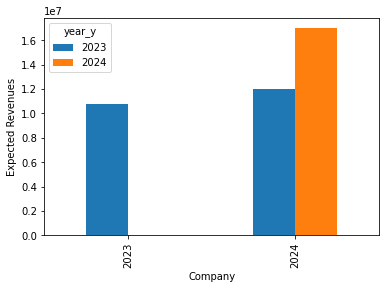

In [396]:
#grouped bar plot
ax = pivoted_data.plot(kind='bar')
ax.set_ylabel('Expected Revenues')
ax.set_xticks(np.asanyarray([i for i in range(pivoted_data.columns.size)]))
ax.set_xticklabels(pivoted_data.columns)
#need to work more on visualisation

## If we consider that Ooredoo revenues grow up linearly, draw a line that represents the increase of revenues and calculate the expected revenue by 2025.


year_y
2023    12000000.0
2024    17000000.0
Name: Ooredoo, dtype: float64


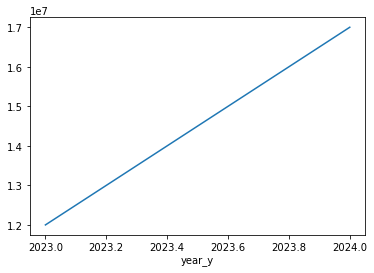

In [397]:
ooredoo_expcetations = pivoted_data.loc['Ooredoo',:]
oredo_ax=ooredoo_expcetations.plot()
oredo_ax.set_xlim()
print(ooredoo_expcetations)

In [398]:
#performin linear regression to predict expectatations in 2025
X=ooredoo_expcetations.index.values
X=X.reshape((2,1))
Y= ooredoo_expcetations.iloc[:]
model = linear_model.LinearRegression()
#train the model
model.fit(X,Y)
prediction=model.predict([[2025]])
print(f'expected revenues for ooredoo by 2025 are {prediction}')

expected revenues for ooredoo by 2025 are [22000000.]


In [399]:
prediction

array([22000000.])

In [400]:
ooredoo_expcetations[2025]=prediction[0]

<AxesSubplot:xlabel='year_y'>

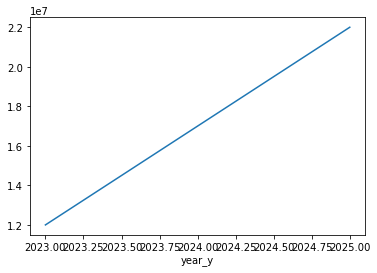

In [401]:
  ooredoo_expcetations.plot()

# EX2

## Let us consider the IRIS dataset (the CSV format). Implement using python the next statistical measures:

In [402]:
iris_data = pd.read_csv('./Iris.csv')
iris_data.set_index('Id',inplace=True)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Min, max, mode, median, standard deviation.


In [403]:
def my_describe(data):
    calculable_indexes = [ x  for x in data.columns if data.loc[:,x].dtype == 'float64']
    data = data[calculable_indexes]
    stat_df = pd.DataFrame({
    'min':[data.loc[:,x].min() for x in data.columns],
    'max':[data.loc[:,x].max() for x in data.columns],    
    'mode':[data.loc[:,x].mode()[0] for x in data.columns],
    'median':[data.loc[:,x].median() for x in data.columns],
    'standard deviation':[data.loc[:,x].std() for x in data.columns],
  },index =calculable_indexes)
    return stat_df

In [404]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [405]:
my_describe(iris_data)

,min,max,mode,median,standard deviation
SepalLengthCm,4.3,7.9,5.0,5.80,0.828066
SepalWidthCm,2.0,4.4,3.0,3.00,0.433594
PetalLengthCm,1.0,6.9,1.5,4.35,1.764420
PetalWidthCm,0.1,2.5,0.2,1.30,0.763161


## Normalize the data using Z-score.

In [406]:
def z_score(col):
    try:
        return stats.zscore(col)
    except:
        return col
    

In [407]:
normalized_iris=iris_data.apply(lambda x: z_score(x))
normalized_iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
2,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
3,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
4,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
5,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...
146,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
147,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
148,0.795669,-0.124958,0.819624,1.053537,Iris-virginica


## Calculate the correlation table (correlation of each two variables.).

In [408]:
correlations=iris_data.corr()
correlations

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Visulizing Correlation

<AxesSubplot:>

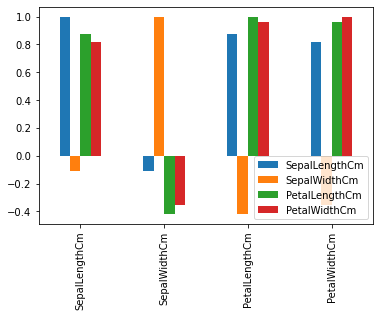

In [409]:
correlations.plot(kind='bar')


In [410]:
#we can conduct PetalLength and width and sepalLength are corelated
#so i think that we can kepp one or two of theme

## Apply PCA on the Data and keep only the two most significant dimensions. 
## a. Visualize the correlation of each two new variables.
## b. What do you conduct?

In [411]:
pca = PCA(n_components=2)
pca_data=pca.fit_transform(normalized_iris[[x for x in normalized_iris.columns if normalized_iris[x].dtype =='float64']])

In [412]:
pc_data = pd.DataFrame(data=pca_data,columns=['PC 1','PC 2'])
pc_data

,PC 1,PC 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [413]:
pc_data.corr()

,PC 1,PC 2
PC 1,1.000000e+00,-6.906984e-17
PC 2,-6.906984e-17,1.000000e+00


# EX3

### Take the same dataset of the first PW series then:
### Check that not all numerical values include a string.
 

In [414]:
sales_data = pd.read_csv('./super_sales_store.csv')
sales_data.set_index('Row ID',inplace=True)

In [415]:
sales_data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [416]:
sales_data.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [417]:
#Yes not all of them include a String

### Check that dates are correct.


In [418]:
data_features = ['Order Date','Ship Date']
dates=sales_data[data_features]
dates

,Order Date,Ship Date
Row ID,,
1,08/11/2017,11/11/2017
2,08/11/2017,11/11/2017
3,12/06/2017,16/06/2017
4,11/10/2016,18/10/2016
5,11/10/2016,18/10/2016
...,...,...
9796,21/05/2017,28/05/2017
9797,12/01/2016,17/01/2016
9798,12/01/2016,17/01/2016


In [419]:
#doing regex on dates
import re
pattern = '^(0?[1-9]|[12][0-9]|3[01])[\/\-](0?[1-9]|1[012])[\/\-]\d{4}$'
def verifyDate(col):
    return col.map(lambda date : not (not re.search(pattern,date)))
# dates.apply(lambda dates: re.search(pattern,date.) for date in dates)
dates.apply(verifyDate,axis=0).describe()
#all dates are correct


,Order Date,Ship Date
count,9800,9800
unique,1,1
top,True,True
freq,9800,9800


### Check that the request id field respects the specific forma:
     “US or CA-YYYY-NUMBER”. 

In [420]:
one = sales_data.iloc[0]

In [421]:
orderID_pattern = '^(US|CA)-\d{4}-\d{6}$'
print(one['Order ID'])
print(one['Order Date'])
print(re.search(orderID_pattern,one['Order ID']))

CA-2017-152156
08/11/2017
<re.Match object; span=(0, 14), match='CA-2017-152156'>


In [422]:
def check_order_id(row):
    orderID = row['Order ID']
    orderDate = row['Order Date']
    orderID_pattern = '^(US|CA)-\d{4}-\d{6}$'
    if not re.search(orderID_pattern,orderID):
        return False
    if orderID.split('-')[1] != orderDate.split('/')[2] :
        return False
    else :
        return True

In [423]:
sales_data.apply(check_order_id,axis=1)

Row ID
1       True
2       True
3       True
4       True
5       True
        ... 
9796    True
9797    True
9798    True
9799    True
9800    True
Length: 9800, dtype: bool

In [424]:
sales_data.apply(check_order_id,axis=1).describe()

count     9800
unique       1
top       True
freq      9800
dtype: object

In [425]:
#all order ids are correct

## EX4

## Lets consider the next table

### 0.5 1 1.5 2 2.5 3 3.5 4 4.5 5 5.5 6 6.5 7 7.5 8
### 2.5 4.30 4.5 5.5 12 25 33 44 89 200 245 350 652 850 1808 2750

### We suppose that data contains noise, and we like to smooth it.

### Use a bin smoothing technique with a bin size equal 1.

In [426]:
from scipy.stats import binned_statistic

In [427]:
table = pd.DataFrame({'x':[0.5 ,1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5 ,8],
                      'y':[2.5, 4.30 ,4.5, 5.5, 12, 25, 33, 44, 89, 200 ,245, 350, 652, 850, 1808 ,2750]})
table

,x,y
0,0.5,2.5
1,1.0,4.3
2,1.5,4.5
3,2.0,5.5
4,2.5,12.0
5,3.0,25.0
6,3.5,33.0
7,4.0,44.0
8,4.5,89.0
9,5.0,200.0


In [428]:
table.set_index('x',inplace=True)


<AxesSubplot:xlabel='x'>

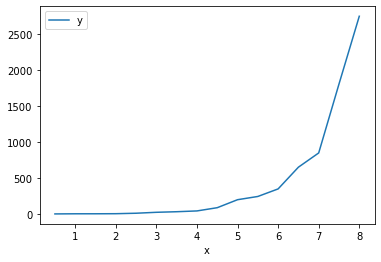

In [429]:
table.plot()

In [430]:
binned_1_info=binned_statistic(table.index,table.y,bins=1)

In [431]:
binned_1_info

BinnedStatisticResult(statistic=array([442.175]), bin_edges=array([0.5, 8. ]), binnumber=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))

In [432]:
statistics=binned_1_info.statistic
bin_edges = binned_1_info.bin_edges
binnumber=binned_1_info.binnumber

In [433]:
binned_table=table.reset_index()

In [434]:
binned_table['binnumber']=binnumber
binned_table['binned_y']=np.nan

binned_table

,x,y,binnumber,binned_y
0,0.5,2.5,1,NaN
1,1.0,4.3,1,NaN
2,1.5,4.5,1,NaN
3,2.0,5.5,1,NaN
4,2.5,12.0,1,NaN
5,3.0,25.0,1,NaN
6,3.5,33.0,1,NaN
7,4.0,44.0,1,NaN
8,4.5,89.0,1,NaN
9,5.0,200.0,1,NaN


In [435]:
def calculate_binned_y(row):
    newRow=row
    newRow['binned_y'] = statistics[row['binnumber'].astype('int')-1]
    return newRow
binned_table=binned_table.apply(calculate_binned_y,axis=1,)
binned_table

,x,y,binnumber,binned_y
0,0.5,2.5,1.0,442.175
1,1.0,4.3,1.0,442.175
2,1.5,4.5,1.0,442.175
3,2.0,5.5,1.0,442.175
4,2.5,12.0,1.0,442.175
5,3.0,25.0,1.0,442.175
6,3.5,33.0,1.0,442.175
7,4.0,44.0,1.0,442.175
8,4.5,89.0,1.0,442.175
9,5.0,200.0,1.0,442.175


<AxesSubplot:xlabel='x'>

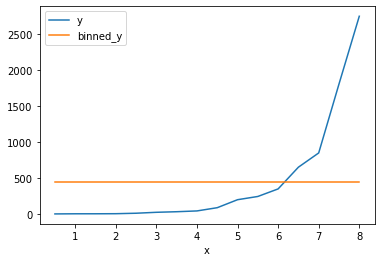

In [436]:
binned_table.set_index('x')[['y','binned_y']].plot()

### Use a linear smoothing technique with a bin size equal 1.

In [437]:
from scipy.signal import savgol_filter

In [438]:
table

,y
x,
0.5,2.5
1.0,4.3
1.5,4.5
2.0,5.5
2.5,12.0
3.0,25.0
3.5,33.0
4.0,44.0
4.5,89.0


In [439]:
savgol_filter(table.y,window_length=15,polyorder=2)

array([ 1.74366471e+02,  5.58236975e+01, -3.16063413e+01, -8.79236458e+01,
       -1.13128216e+02, -1.07220052e+02, -7.01991532e+01, -2.06552036e+00,
       -3.34108597e+00,  1.59161829e+02,  3.72539147e+02,  6.36790866e+02,
        9.51916988e+02,  1.31791751e+03,  1.73479244e+03,  2.20254176e+03])

In [440]:
linear_binned = table

<AxesSubplot:xlabel='x'>

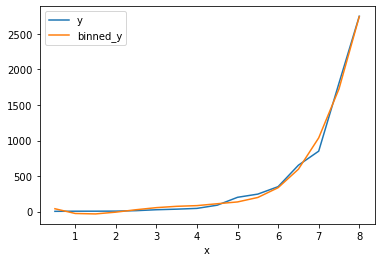

In [441]:
linear_binned['binned_y'] = savgol_filter(table.y,window_length=15,polyorder=4)
linear_binned.plot()

### If you know that data distribution is exponential, propose a better smoothing technique.

In [445]:
#exponential smoothing
from scipy.signal.windows import exponential

In [450]:
expo_binned = table

In [449]:
exponential(8,table.y.mean(),sym=False)

array([9.24352169e-193, 2.51264970e-192, 6.83009003e-192, 1.85661096e-191,
       5.04679184e-191, 1.37186025e-190, 3.72910280e-190, 1.01367524e-189,
       2.75545498e-189, 7.49010320e-189, 2.03602114e-188, 5.53447927e-188,
       1.50442744e-187, 4.08945778e-187, 1.11162988e-186])

          y  binned_y
x                    
0.5     2.5  0.999500
1.0     4.3  0.999567
1.5     4.5  0.999633
2.0     5.5  0.999700
2.5    12.0  0.999767
3.0    25.0  0.999833
3.5    33.0  0.999900
4.0    44.0  0.999967
4.5    89.0  0.999967
5.0   200.0  0.999900
5.5   245.0  0.999833
6.0   350.0  0.999767
6.5   652.0  0.999700
7.0   850.0  0.999633
7.5  1808.0  0.999567
8.0  2750.0  0.999500


<AxesSubplot:xlabel='x'>

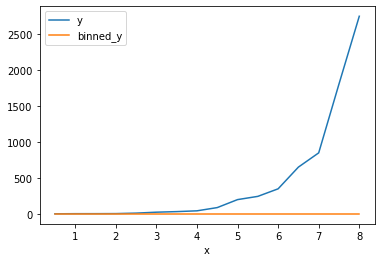

In [467]:
expo_binned['binned_y'] = exponential(16,tau=15000)
print(expo_binned)
expo_binned.plot()

## up is a desaster

## EX5